In [299]:
import os
import shutil
from sklearn.model_selection import train_test_split

dataset_dir = '/Users/madi/Downloads/brain-tumor-mri-dataset'
train_dir = '/Users/madi/Downloads/brain-tumor-mri-dataset/train_set'
test_dir = '/Users/madi/Downloads/brain-tumor-mri-dataset/test_set'


os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


classes = ['glioma', 'meningioma', 'notumor', 'pituitary']


for class_name in classes:
    class_path = os.path.join(dataset_dir, class_name)
    images = os.listdir(class_path)

    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))
    for img in test_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

print("Dataset split into training and test sets.")


Dataset split into training and test sets.


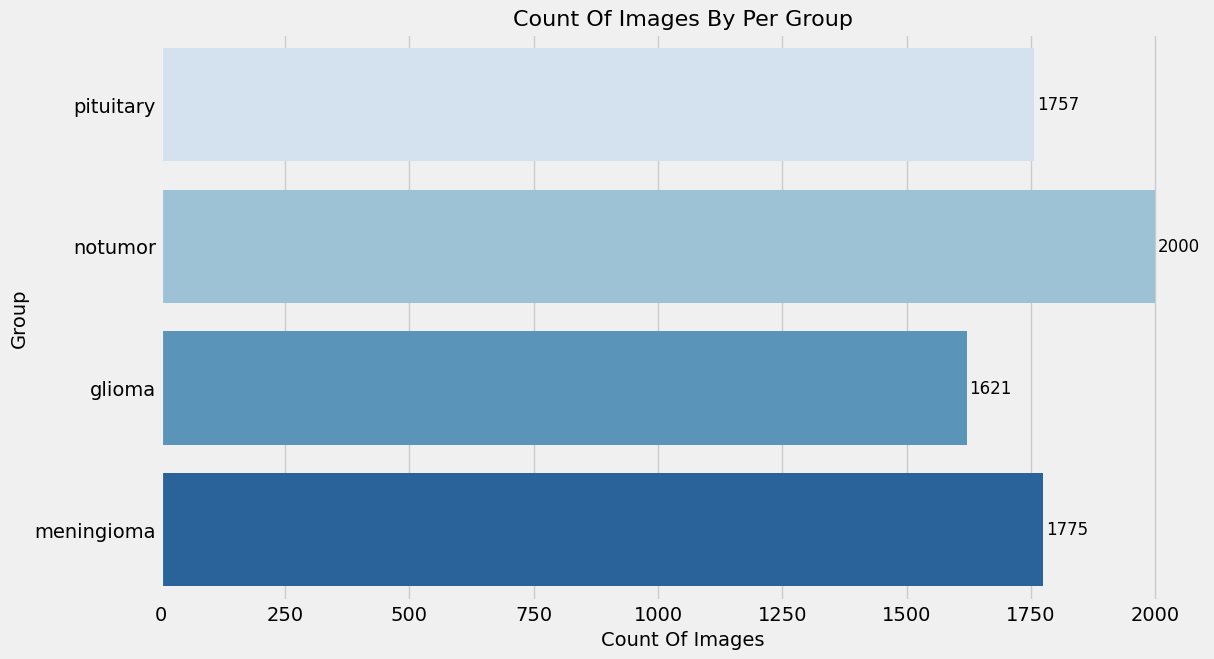

In [274]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,7))
bar_plot = sns.barplot(x='Image Count', y='Class', 
    data=image_counts_df[(image_counts_df['Class'] == 'pituitary') | 
    (image_counts_df['Class'] == 'notumor') |
    (image_counts_df['Class'] == 'glioma') |
    (image_counts_df['Class'] == 'meningioma') ],palette='Blues',hue= 'Class' 
)

for bar in bar_plot.patches:
    plt.text(
        bar.get_width() + 5,  
        bar.get_y() + bar.get_height() / 2,  
        f'{int(bar.get_width())}',  
        va='center', ha='left', fontsize=12, color='black'
    )

plt.title("Count Of Images By Per Group", fontsize=16)
plt.xlabel("Count Of Images", fontsize=14)
plt.ylabel("Group", fontsize=14)
plt.show()


### Transformation & Advanced machine Learning Techinices:(Adam optimizer, Droupout, Data Augimentation, CNN, Softmax, validation, hyperparameter tunning)

## 

In [300]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 64
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,  
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

Found 5721 images belonging to 4 classes.
Found 1432 images belonging to 4 classes.


#### Proper model selection and implementation with justified choices. Demonstrates technical rigor and includes hyperparameter tuning and validation.

##  Dropout & Adam & Hyperparameter tunning(dropout rate -> 0.5), batch size -> 32 , Filter quantities -> 32,64,128. Conv2d and etc.

In [317]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')  
])

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_81 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_81 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_82 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_83 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_27 (Flatten)            │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,716 (2.61 MB)

 Trainable params: 683,716 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

## Validation and improving CNN Accuracy

In [302]:
history = model.fit(
    train_generator,
    epochs=35,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - accuracy: 0.4421 - loss: 1.1613 - val_accuracy: 0.4652 - val_loss: 1.3647
Epoch 2/35
  1/178 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.6250 - loss: 0.9634

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6250 - loss: 0.9634 - val_accuracy: 0.5312 - val_loss: 1.1394
Epoch 3/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 24s 137ms/step - accuracy: 0.7079 - loss: 0.7341 - val_accuracy: 0.6449 - val_loss: 0.9849
Epoch 4/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7188 - loss: 0.4647 - val_accuracy: 0.6307 - val_loss: 1.0187
Epoch 5/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 23s 129ms/step - accuracy: 0.7636 - loss: 0.6048 - val_accuracy: 0.5234 - val_loss: 1.4842
Epoch 6/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8438 - loss: 0.4410 - val_accuracy: 0.5788 - val_loss: 1.2461
Epoch 7/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.8042 - loss: 0.5132 - val_accuracy: 0.7784 - val_loss: 0.6027
Epoch 8/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8438 - loss: 0.3906 - val_accuracy: 0.7493 - val_loss: 0.7107
Epoch 9/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.8264 - loss: 0.4471 - val_accuracy: 0

In [303]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc*100:.2f}%")


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9512 - loss: 0.1150
Test accuracy: 96.30%


In [304]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

report = classification_report(true_classes, predicted_classes, target_names=class_labels, digits=4)
print("Classification Report:")
print(report)

cm = confusion_matrix(true_classes, predicted_classes)
cm_rounded = np.round(cm, 4)
print("Confusion Matrix:")
print(cm_rounded)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step
Classification Report:
              precision    recall  f1-score   support

      glioma     0.9335    0.9508    0.9421       325
  meningioma     0.9459    0.9352    0.9405       355
     notumor     0.9828    0.9975    0.9901       400
   pituitary     0.9855    0.9631    0.9741       352

    accuracy                         0.9630      1432
   macro avg     0.9619    0.9616    0.9617      1432
weighted avg     0.9631    0.9630    0.9630      1432

Confusion Matrix:
[[309  14   0   2]
 [ 14 332   6   3]
 [  0   1 399   0]
 [  8   4   1 339]]


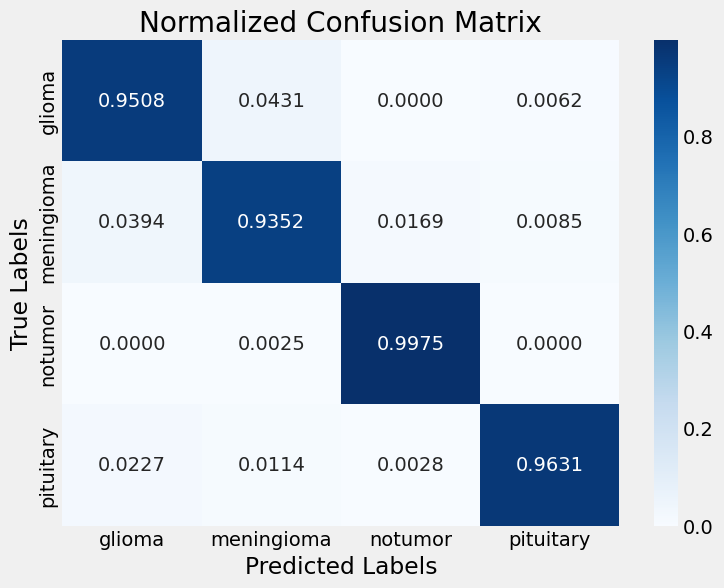

In [305]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.4f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()

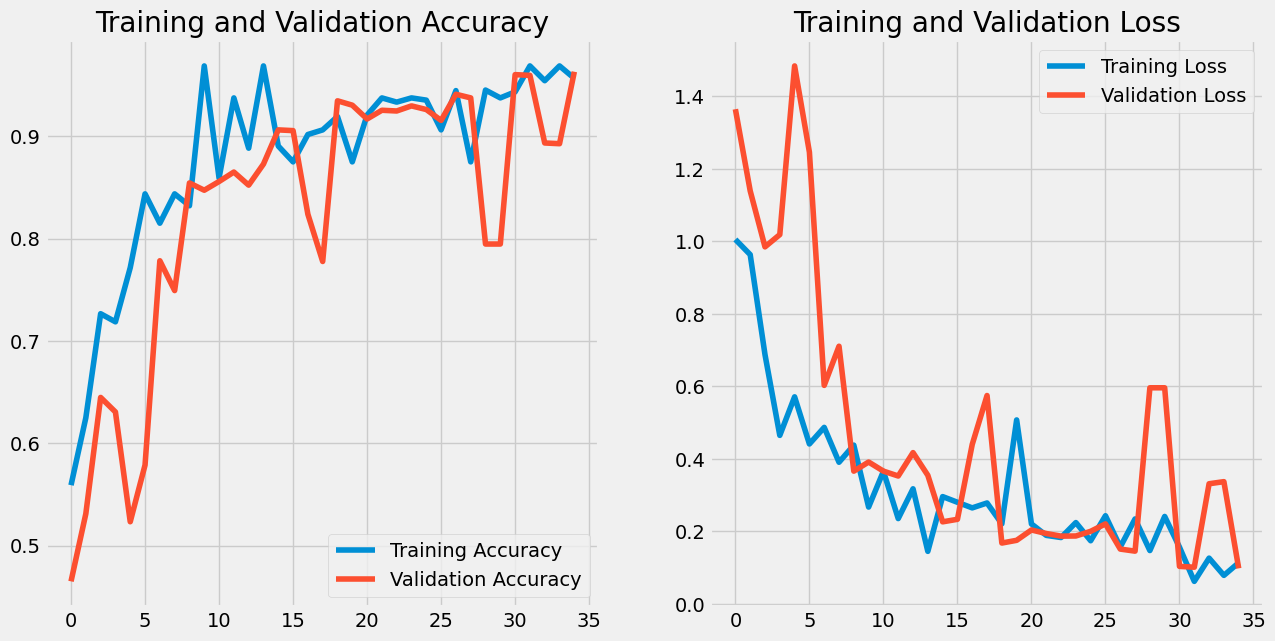

In [306]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


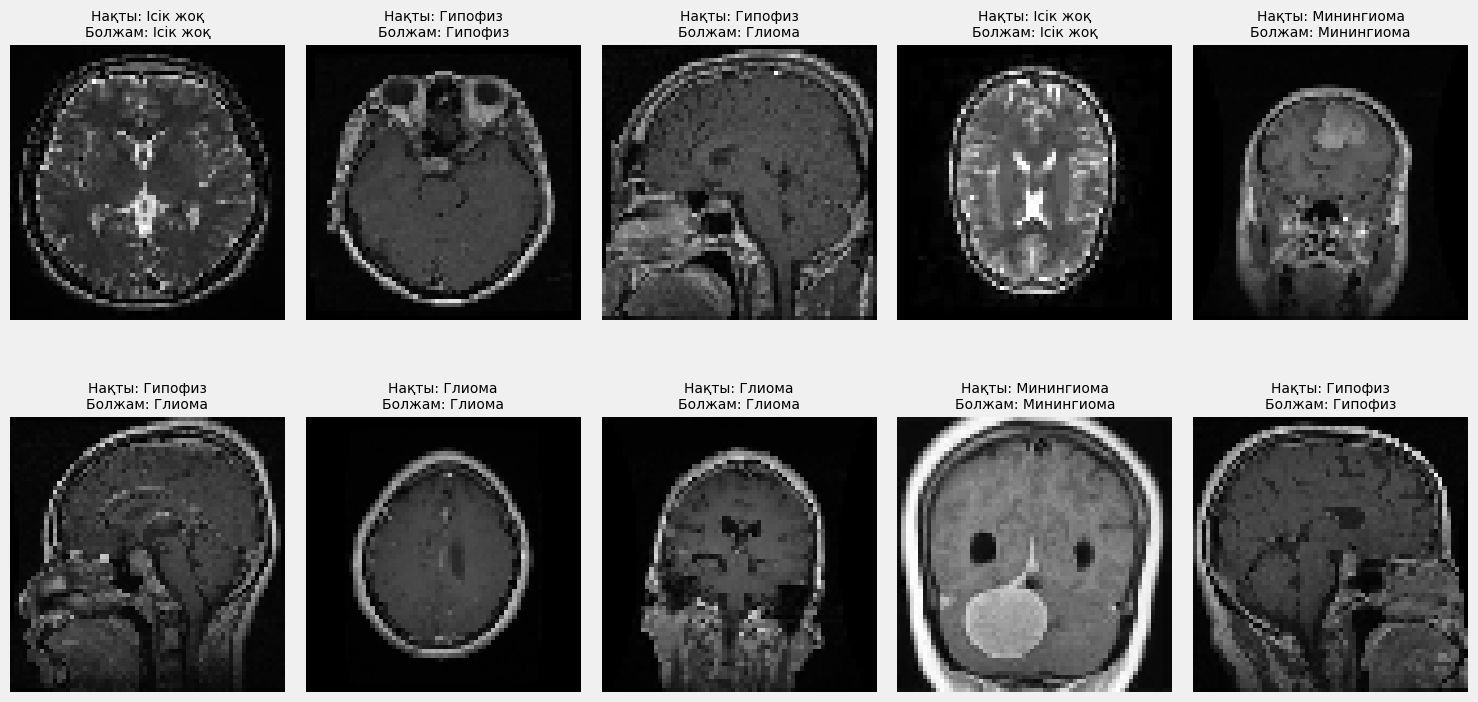

In [316]:
import random
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

class_translation = {
    'notumor': 'Ісік жоқ',
    'pituitary': 'Гипофиз',
    'glioma': 'Глиома',
    'meningioma': 'Минингиома'
}

def predict_random_images_with_subplots_kz(test_dir, num_images=10):
    fig, axes = plt.subplots(2, 5, figsize=(15, 8))  
    axes = axes.flatten()  

    classes = [folder for folder in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, folder))]
    
    for ax in axes:
        random_class = random.choice(classes)
        class_path = os.path.join(test_dir, random_class)
        
        image_files = [f for f in os.listdir(class_path) if not f.startswith('.')]
        
        if not image_files:
            continue
        
        random_image_name = random.choice(image_files)
        image_path = os.path.join(class_path, random_image_name)
        
        img = load_img(image_path, target_size=(img_size, img_size))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)  
        
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction, axis=1)[0]
        
        true_class_name = random_class  
        predicted_class_name = class_translation[class_labels[predicted_class]]  
        
        ax.imshow(img)
        ax.set_title(f"Нақты: {class_translation[true_class_name]}\nБолжам: {predicted_class_name}", fontsize=10)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

predict_random_images_with_subplots_kz(test_dir, num_images=10)
